# Applciation of Sklearn Libraries 



---


### Take a look California Housing data and to machine-learning to predict house-values using demonstrating the used primarily scikit-learna and data science techniques like:

- Visualization to gain insights about the data

- imputation to replace missing values withough altering the statistic data

- label encoding to convert categorical data into numeric categorical data

- One-hot encoding 



---

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

In [2]:
# Fetch Synthetic data from the sklearn

from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()

In [4]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
house = os.path.join('Resources','housing.csv')

In [7]:
# Covert the data to Dataframe

housing = pd.read_csv(house)
housing[:5].T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41,21,52,52,52
total_rooms,880,7099,1467,1274,1627
total_bedrooms,129,1106,190,235,280
population,322,2401,496,558,565
households,126,1138,177,219,259
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600,358500,352100,341300,342200
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [8]:
# Get the dataframe info

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
# Describe

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
# Correlation

housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00cd3df9e8>,
      dtype=object)

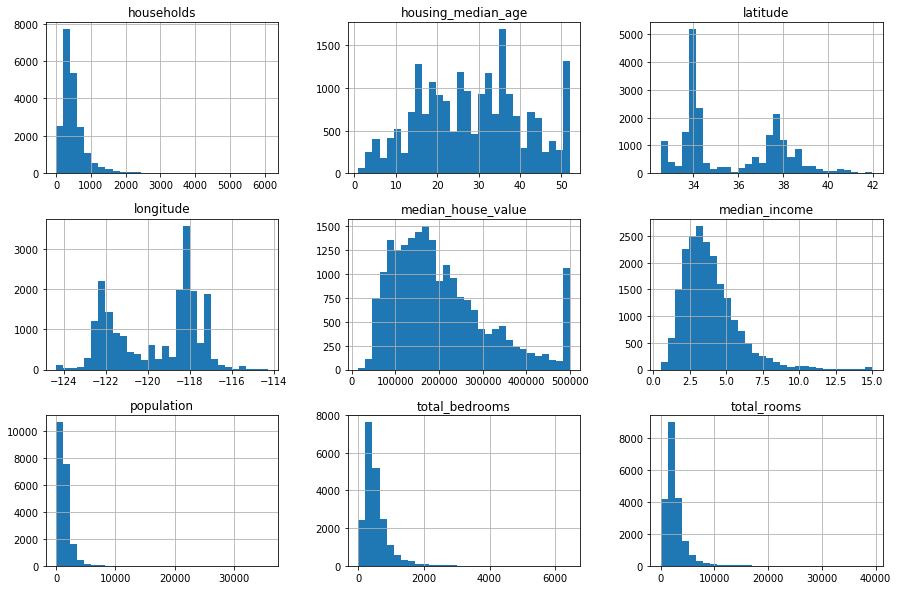

In [12]:
housing.hist(figsize=(15,10), bins=30)

#### Dividing the data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2)

In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3985,-118.64,34.19,33.0,3017.0,494.0,1423.0,470.0,5.6163,248400.0,<1H OCEAN
13125,-121.35,38.28,17.0,2756.0,557.0,1986.0,530.0,3.2234,82000.0,INLAND
3164,-118.82,35.20,34.0,2185.0,469.0,1910.0,455.0,2.1136,57300.0,INLAND
10662,-117.81,33.66,20.0,2851.0,490.0,1192.0,463.0,5.8752,274200.0,<1H OCEAN
3515,-118.47,34.25,34.0,1732.0,399.0,1120.0,401.0,4.1492,195700.0,<1H OCEAN


In [16]:
train_set.size

165120

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15651,-122.41,37.79,52.0,2302.0,938.0,1515.0,861.0,1.3668,55000.0,NEAR BAY
8086,-118.20,33.81,46.0,1388.0,254.0,742.0,241.0,4.6458,212100.0,NEAR OCEAN
14220,-117.06,32.66,33.0,3425.0,511.0,1528.0,479.0,5.6889,234600.0,NEAR OCEAN
8779,-118.32,33.80,39.0,1415.0,298.0,729.0,278.0,3.1648,244800.0,<1H OCEAN
2017,-119.80,36.72,19.0,1334.0,336.0,1171.0,319.0,1.0481,48500.0,INLAND


In [18]:
test_set.size

41280

#### Check the data features

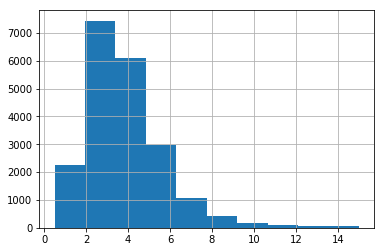

In [19]:
housing['median_income'].hist()

In [20]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


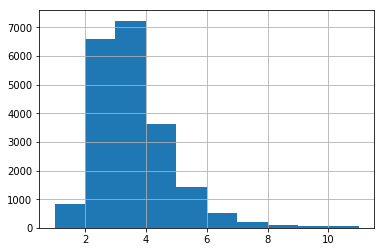

In [22]:
housing['income_cat'].hist()

In [23]:
housing.income_cat.value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [24]:
# Minimize our category to 5, so all income_cat with less than 5 will be aggregated into 5 category
# housing.income_cat.where(housing.income_cat<5, 5.0, inplace=True)

housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

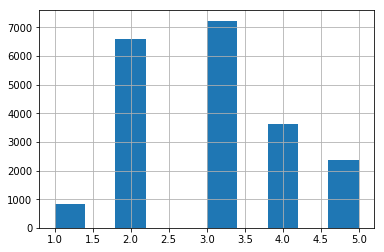

In [25]:
housing.income_cat.hist()

#### Stratified-Shuffled split of Data into Train/Test Split

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

In [28]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

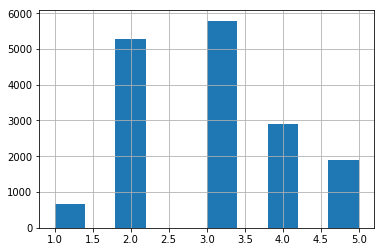

In [29]:
s_train_set['income_cat'].hist()

In [30]:
housing = s_train_set.copy()

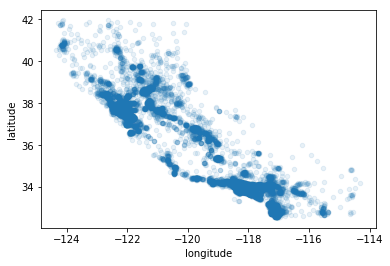

In [31]:
# use alpha parameter to see concentration

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

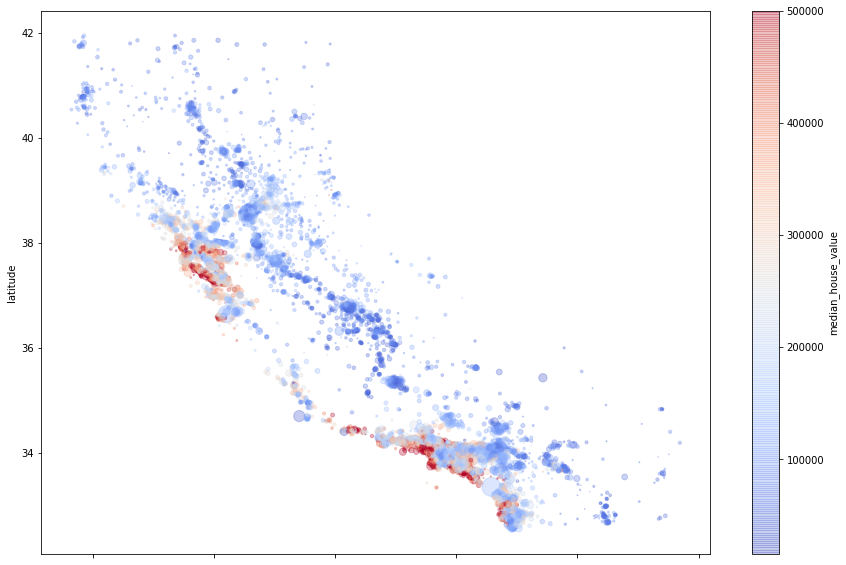

In [32]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3, 
             s=housing['population']/100, c='median_house_value',
            figsize=(15,10), cmap=plt.get_cmap('coolwarm'),
            colorbar=True)

In [33]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924732,-0.110144,0.046174,0.071453,0.102503,0.056801,-0.014818,-0.049564,-0.010348
latitude,-0.924732,1.000000,0.014066,-0.039491,-0.070843,-0.113623,-0.074771,-0.079758,-0.141231,-0.084765
housing_median_age,-0.110144,0.014066,1.000000,-0.360593,-0.319595,-0.296143,-0.302555,-0.117861,0.105832,-0.147722
total_rooms,0.046174,-0.039491,-0.360593,1.000000,0.930503,0.852523,0.918016,0.198836,0.134132,0.220196
total_bedrooms,0.071453,-0.070843,-0.319595,0.930503,1.000000,0.875031,0.979821,-0.008256,0.050234,0.014742
population,0.102503,-0.113623,-0.296143,0.852523,0.875031,1.000000,0.904287,0.003210,-0.025731,0.022749
households,0.056801,-0.074771,-0.302555,0.918016,0.979821,0.904287,1.000000,0.013452,0.067484,0.038081
median_income,-0.014818,-0.079758,-0.117861,0.198836,-0.008256,0.003210,0.013452,1.000000,0.686992,0.904046
median_house_value,-0.049564,-0.141231,0.105832,0.134132,0.050234,-0.025731,0.067484,0.686992,1.000000,0.642003
income_cat,-0.010348,-0.084765,-0.147722,0.220196,0.014742,0.022749,0.038081,0.904046,0.642003,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00ca1a4860>,
      dtype=object)

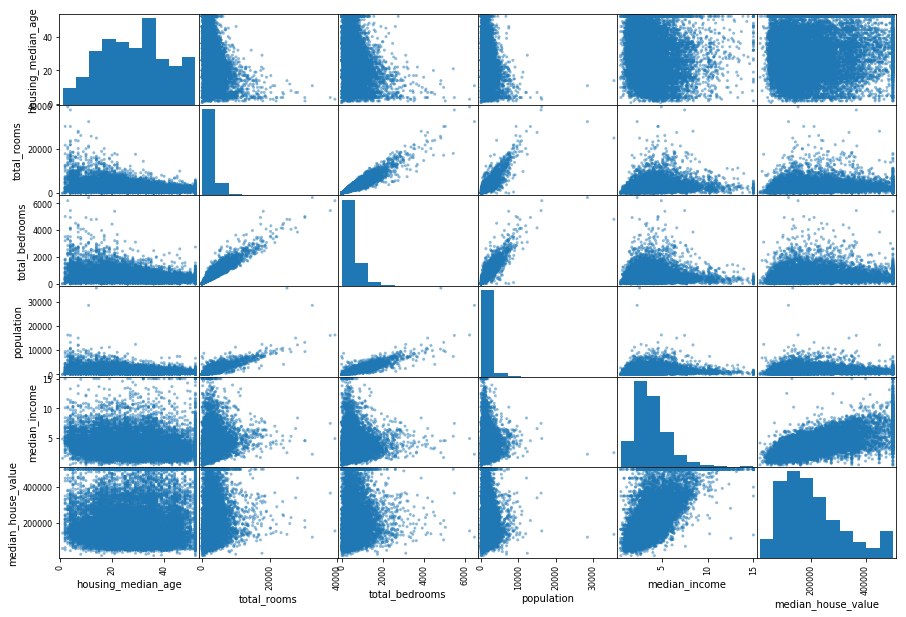

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[['housing_median_age', 'total_rooms', 'total_bedrooms','population', 
                        'median_income', 'median_house_value']],
              figsize=(15,10))

#### Data PreProcessing

#### Using Pandas

In [35]:
# Create a copy of the training data set

housing = s_train_set.copy()

In [36]:
# Drop the target variable from the train set

housing.drop('median_house_value', axis=1, inplace=True)
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7934,-118.08,33.82,26.0,4259.0,588.0,1644.0,581.0,6.2519,<1H OCEAN,5.0
20534,-121.74,38.56,18.0,3960.0,1151.0,2248.0,1144.0,1.7257,INLAND,2.0
9433,-122.80,38.18,36.0,2378.0,476.0,957.0,362.0,3.6250,NEAR OCEAN,3.0
19615,-121.27,37.56,31.0,1223.0,330.0,1067.0,245.0,2.8558,INLAND,2.0
16790,-122.46,37.65,21.0,2751.0,502.0,2027.0,491.0,5.2573,NEAR OCEAN,4.0


In [37]:
# Create a copy of the target variable of train set

housing_labels = s_train_set['median_house_value'].copy()
housing_labels.tail()

7934     345700.0
20534    179100.0
9433     253100.0
19615    100000.0
16790    322900.0
Name: median_house_value, dtype: float64

In [40]:
# Rows with Null Values on the training dataset - Features

incomplete_rows = housing[housing.isnull().any(axis=1)]
incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
18332,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,NEAR BAY,3.0
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,<1H OCEAN,5.0
4447,-118.21,34.07,52.0,1770.0,NaN,1848.0,439.0,2.4135,<1H OCEAN,2.0
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN,2.0
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,3.0


#### Imputing the NaN Values

In [41]:
# Drop all rows with Null values on total bedrooms
# incomplete_rows.dropna(subset=['total_bedrooms'])

In [42]:
# this is an option to dropt the this featuer
#incomplete_rows.drop('total_bedrooms', axis=1)

In [43]:
# Fill NaN with median values

incomplete_rows['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
# Print the sample

incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
18332,-122.16,37.45,47.0,4234.0,435.0,1808.0,1093.0,4.2297,NEAR BAY,3.0
15607,-116.66,32.79,13.0,843.0,435.0,918.0,152.0,6.2152,<1H OCEAN,5.0
4447,-118.21,34.07,52.0,1770.0,435.0,1848.0,439.0,2.4135,<1H OCEAN,2.0
5665,-118.29,33.73,30.0,3161.0,435.0,1865.0,771.0,2.7139,NEAR OCEAN,2.0
4691,-118.37,34.07,50.0,2519.0,435.0,1117.0,516.0,4.3667,<1H OCEAN,3.0


---

#### Using Scikit-Learn

In [45]:
# Import the Scikit Learn Library


from sklearn.impute import SimpleImputer

In [46]:
# Create the imputer

imputer = SimpleImputer(strategy='median')

In [47]:
# Print a preview

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7374,-118.22,33.97,47.0,1688.0,386.0,1663.0,381.0,4.0609,<1H OCEAN,3.0
7788,-118.06,33.89,26.0,2483.0,412.0,1538.0,449.0,5.1104,<1H OCEAN,4.0
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444,INLAND,2.0
15886,-122.38,37.73,18.0,4037.0,990.0,2722.0,834.0,1.4282,NEAR BAY,1.0
2847,-118.95,35.40,23.0,4483.0,894.0,2136.0,883.0,3.6875,INLAND,3.0


In [48]:
# Drop the non-numeric feature from the training set

numeric_housing = housing.drop('ocean_proximity', axis =1)
numeric_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
7374,-118.22,33.97,47.0,1688.0,386.0,1663.0,381.0,4.0609,3.0
7788,-118.06,33.89,26.0,2483.0,412.0,1538.0,449.0,5.1104,4.0
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444,2.0
15886,-122.38,37.73,18.0,4037.0,990.0,2722.0,834.0,1.4282,1.0
2847,-118.95,35.40,23.0,4483.0,894.0,2136.0,883.0,3.6875,3.0


In [50]:
# apply the imputer to the training set

imputer.fit(numeric_housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [51]:
# Imputer will return statistics

imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  435.     ,
       1167.     ,  410.     ,    3.53795,    3.     ])

In [52]:
# Validate that the statistical data from before and after impute are the same

numeric_housing.median().values

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  435.     ,
       1167.     ,  410.     ,    3.53795,    3.     ])

In [53]:
# Feaures are usually assign to variable X

X = imputer.transform(numeric_housing)
X

array([[-118.22  ,   33.97  ,   47.    , ...,  381.    ,    4.0609,
           3.    ],
       [-118.06  ,   33.89  ,   26.    , ...,  449.    ,    5.1104,
           4.    ],
       [-120.96  ,   37.61  ,   23.    , ...,  816.    ,    1.9444,
           2.    ],
       ...,
       [-122.8   ,   38.18  ,   36.    , ...,  362.    ,    3.625 ,
           3.    ],
       [-121.27  ,   37.56  ,   31.    , ...,  245.    ,    2.8558,
           2.    ],
       [-122.46  ,   37.65  ,   21.    , ...,  491.    ,    5.2573,
           4.    ]])

In [55]:
# To get from the dataframe view after impute

transformed_housing = pd.DataFrame(X, columns=numeric_housing.columns, index=list(housing.index.values))
transformed_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
7374,-118.22,33.97,47.0,1688.0,386.0,1663.0,381.0,4.0609,3.0
7788,-118.06,33.89,26.0,2483.0,412.0,1538.0,449.0,5.1104,4.0
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444,2.0
15886,-122.38,37.73,18.0,4037.0,990.0,2722.0,834.0,1.4282,1.0
2847,-118.95,35.40,23.0,4483.0,894.0,2136.0,883.0,3.6875,3.0


#### Another Method

In [56]:
# antother method is using the fit_transformed combining both fit and transformed

X = imputer.fit_transform(numeric_housing)
X

array([[-118.22  ,   33.97  ,   47.    , ...,  381.    ,    4.0609,
           3.    ],
       [-118.06  ,   33.89  ,   26.    , ...,  449.    ,    5.1104,
           4.    ],
       [-120.96  ,   37.61  ,   23.    , ...,  816.    ,    1.9444,
           2.    ],
       ...,
       [-122.8   ,   38.18  ,   36.    , ...,  362.    ,    3.625 ,
           3.    ],
       [-121.27  ,   37.56  ,   31.    , ...,  245.    ,    2.8558,
           2.    ],
       [-122.46  ,   37.65  ,   21.    , ...,  491.    ,    5.2573,
           4.    ]])

---

In [57]:
# Check that the Imputer successfully impute the Null values with median value

transformed_housing.loc[incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
18332,-122.16,37.45,47.0,4234.0,435.0,1808.0,1093.0,4.2297,3.0
15607,-116.66,32.79,13.0,843.0,435.0,918.0,152.0,6.2152,5.0
4447,-118.21,34.07,52.0,1770.0,435.0,1848.0,439.0,2.4135,2.0
5665,-118.29,33.73,30.0,3161.0,435.0,1865.0,771.0,2.7139,2.0
4691,-118.37,34.07,50.0,2519.0,435.0,1117.0,516.0,4.3667,3.0
11741,-121.13,38.87,48.0,1127.0,435.0,530.0,186.0,3.0917,3.0
19833,-119.38,36.53,38.0,1281.0,435.0,1423.0,293.0,1.9602,2.0
1493,-122.01,37.94,23.0,3741.0,435.0,1339.0,499.0,6.7061,5.0
4667,-118.29,34.05,34.0,1102.0,435.0,1325.0,439.0,1.5972,2.0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,2.0


---

### Non-Numerical Data

In [58]:
housing['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [59]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
7374,<1H OCEAN
7788,<1H OCEAN
19566,INLAND
15886,NEAR BAY
2847,INLAND


In [60]:
# Transform this categorical data into numeric categorical data

from sklearn.preprocessing import LabelEncoder

In [62]:
# Create an categorical encoder

encoder = LabelEncoder()

In [63]:
encoded_housing_cat = encoder.fit_transform(housing_cat)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
encoded_housing_cat

array([0, 0, 1, ..., 4, 1, 4])

In [65]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

---

#### Ordinal Encoder

In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
ordinal_encoder = OrdinalEncoder()

In [71]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [72]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---

#### One-Hot Encoding

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
onehot_encoder = OneHotEncoder()

In [76]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_onehot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [77]:
housing_cat_onehot_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [80]:
housing_cat[:10]

,ocean_proximity
7374,<1H OCEAN
7788,<1H OCEAN
19566,INLAND
15886,NEAR BAY
2847,INLAND
3792,<1H OCEAN
19739,INLAND
11413,<1H OCEAN
2497,INLAND
13092,INLAND


> #### Sparse set to True for memory optimization

In [81]:
onehot_encoder = OneHotEncoder(sparse=False)

In [82]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)
housing_cat_onehot_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [84]:
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---

#### Write a Customized Encoder

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

In [88]:
rooms_i, bedrooms_i, population_i, household_i = 3,4,5,6

In [ ]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self):
        return self
    
    def transform(self):
        pass